# MNIST Digit Recognition
final goal of project is to classify any single handwritten digit form jpeg file

### loading dataset and  data loader

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor() 
])

# Download and load the training data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Download and load the test data
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# creating  data loaders to handle dataset
bs = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False, num_workers=2)


### Drawing a sample from dataset

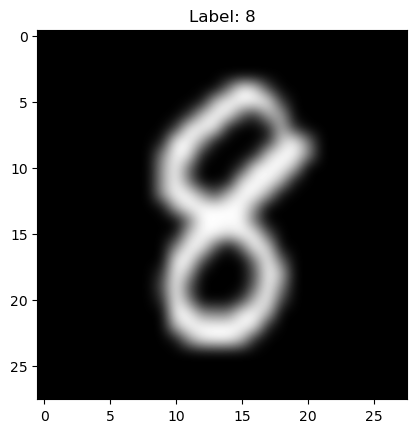

In [48]:
sample,label =train_dataset[np.random.randint(len(train_dataset))]
sample = sample.permute(1,2,0)
plt.imshow(sample,cmap='gray',interpolation='bicubic')
plt.title(f"Label: {label}")
plt.show()


### Defining Model class

In [ ]:
import torch.nn.functional as F
class MNIST_classifier (nn.Module):
    def __init__(self):
        super(MNIST_classifier, self).__init__()
        input_layer = 784
        hidden_layer1 = 64
        hidden_layer2 = 64
        output_layer = 10
        self.linear1 = nn.Linear(input_layer, hidden_layer1)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_layer2, output_layer)

    def forward (self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.linear3(x)
        return x
    
    def inference (self, x):
        x = self.forward(x)
        x = F.softmax(x, dim=1)
        return x
    

### Training loop

In [ ]:
model = MNIST_classifier()
num_epochs = 10
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

for epoch in range (num_epochs):
    model.train()
    running_loss = 0
    for idx, (images,labels) in enumerate(train_loader):
        model.parameters.zero_grad()
        predictions = model(images)
        loss = criterion(predictions,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')



### Evaluation model performance

### Testing Model predictions on sample data 

### Saving Model